In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Read the original data files (.tsv files)
jeopardy_adult_df= pd.read_csv('master_season1-35.tsv', sep='\t')
jeopardy_adult_df


,round,value,daily_double,category,comments,answer,question,air_date,notes
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,1984-09-10,-
...,...,...,...,...,...,...,...,...,...
349636,2,400,no,MAKE IT SNAPPY,-,"As well as photosharing on this app, you can w...",Snapchat,2019-07-26,-
349637,2,800,no,MAKE IT SNAPPY,-,"Genus Antirrhinum, these flowers snap closed a...",snapdragons,2019-07-26,-
349638,2,1600,no,MAKE IT SNAPPY,-,This hyphenated tool company owns brands like ...,Snap-On,2019-07-26,-
349639,2,2000,no,MAKE IT SNAPPY,-,"In 2019 meteorologist Daryl Ritchison at NDSU,...",North Dakota State University,2019-07-26,-


In [2]:
# Read the data files, change air_date to date to use for sorting & making it the index
jeopardy_df= pd.read_csv('master_season1-35.tsv', sep='\t', infer_datetime_format=True, parse_dates=True, index_col="air_date")
jeopardy_df

,round,value,daily_double,category,comments,answer,question,notes
air_date,,,,,,,,
1984-09-10,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,-
1984-09-10,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,-
1984-09-10,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,-
1984-09-10,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,-
1984-09-10,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,-
...,...,...,...,...,...,...,...,...
2019-07-26,2,400,no,MAKE IT SNAPPY,-,"As well as photosharing on this app, you can w...",Snapchat,-
2019-07-26,2,800,no,MAKE IT SNAPPY,-,"Genus Antirrhinum, these flowers snap closed a...",snapdragons,-
2019-07-26,2,1600,no,MAKE IT SNAPPY,-,This hyphenated tool company owns brands like ...,Snap-On,-


In [3]:
#delete un-needed columns for my category questions
jeopardy_df.drop('comments', axis=1, inplace=True)
jeopardy_df.drop('notes', axis=1, inplace=True)
jeopardy_df.drop('value', axis=1, inplace=True)
jeopardy_df.drop('daily_double', axis=1, inplace=True)
jeopardy_df.drop('answer', axis=1, inplace=True)
jeopardy_df.drop('question', axis=1, inplace=True)

jeopardy_df

,round,category
air_date,,
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,INVENTIONS
...,...,...
2019-07-26,2,MAKE IT SNAPPY
2019-07-26,2,MAKE IT SNAPPY
2019-07-26,2,MAKE IT SNAPPY


In [4]:
#separate out the final round (3) rows & save as dataframe for later use
finals_df = jeopardy_df.loc[jeopardy_df["round"] == 3]
finals_df

,round,category
air_date,,
1984-09-10,3,HOLIDAYS
1984-09-11,3,THE CALENDAR
1984-09-12,3,LANGUAGE
1984-09-13,3,AMERICAN GOVERNMENT
1984-09-14,3,THE OLYMPICS
...,...,...
2019-07-22,3,LANDMARKS
2019-07-23,3,TOYS & GAMES
2019-07-24,3,CHILDREN'S AUTHORS


In [5]:
#separate out the Rounds 1 & 2 rows & save as dataframe for later use
early_df = jeopardy_df.loc[(jeopardy_df["round"] == 1) | (jeopardy_df["round"] == 2)]
early_df

,round,category
air_date,,
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,LAKES & RIVERS
1984-09-10,1,INVENTIONS
...,...,...
2019-07-26,2,SHAKESPEAREAN DOUBLE BLANK VERSE
2019-07-26,2,MAKE IT SNAPPY
2019-07-26,2,MAKE IT SNAPPY


In [6]:
#pull out rows from air dates in 1984-1989 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_80 = early_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_80 = len(early_df['1984':'1989'].groupby("category"))
print(early_80)
print(count_80)

                     round
category                  
SPORTS                 283
SCIENCE                203
U.S. HISTORY           169
ANIMALS                166
BUSINESS & INDUSTRY    165
2633


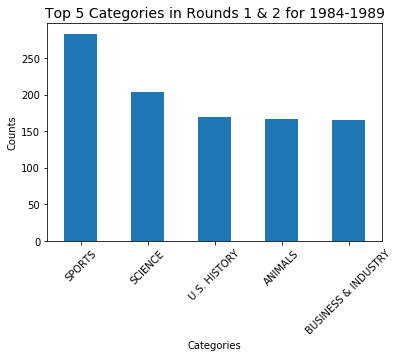

In [7]:
#plot category values from air dates in 1984-1989 for rounds 1 & 2 
title_80="Top 5 Categories in Rounds 1 & 2 for 1984-1989"
early_80 = early_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_80, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig1_80s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [8]:
#pull out rows from air dates in 1984-1989 for final round by using groupby & to find top 5 categories with total count
final_80 = finals_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f80 = len(finals_df['1984':'1989'].groupby("category"))
print(final_80)
print(count_f80)
  

                     round
category                  
THE OSCARS              15
BUSINESS & INDUSTRY     13
STATE CAPITALS          11
MONARCHS                 9
U.S. PRESIDENTS          9
265


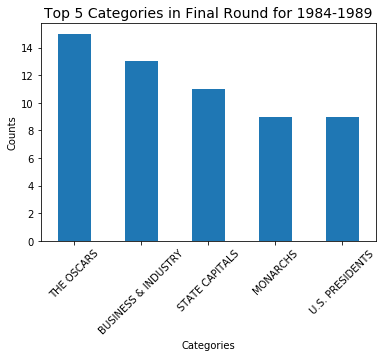

In [9]:
#plot category values from air dates in 1984-1989 for Final Round
title_f80="Top 5 Categories in Final Round for 1984-1989"
final_80 = finals_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f80, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig2_80s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

In [10]:
#pull out rows from air dates in 1990-1999 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_90 = early_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_90 = len(early_df['1990':'1999'].groupby("category"))
print(early_90)
print(count_90)

                  round
category               
LITERATURE          408
WORLD GEOGRAPHY     378
HISTORY             375
SCIENCE             366
AMERICAN HISTORY    351
7358


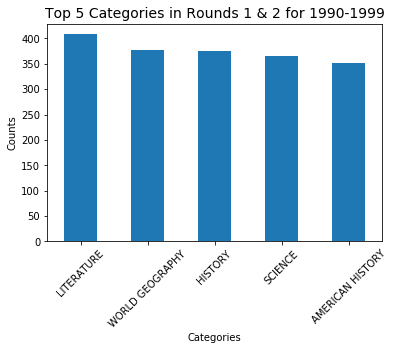

In [11]:
#plot category values from air dates in 1990-1999 for rounds 1 & 2 
title_90="Top 5 Categories in Rounds 1 & 2 for 1990-1999"
early_90 = early_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_90, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig3_90s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [12]:
#pull out rows from air dates in 1990-1999 for final round by using groupby & to find top 5 categories with total count
final_90 = finals_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f90 = len(finals_df['1990':'1999'].groupby("category"))
print(final_90)
print(count_f90)
  

                        round
category                     
U.S. PRESIDENTS            28
BUSINESS & INDUSTRY        17
STATE CAPITALS             14
FAMOUS NAMES               14
COUNTRIES OF THE WORLD     13
687


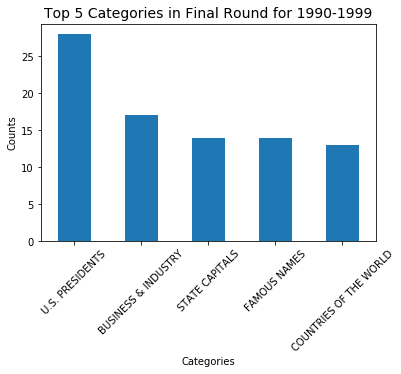

In [13]:
#plot out category values from air dates in 1990-1999 for Final Round (3)
title_f90="Top 5 Categories in Final Round for 1990-1999"
final_90 = finals_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f90, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig4_90s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

In [14]:
#pull out rows from air dates in 2000-2009 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_00 = early_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_00 = len(early_df['2000':'2009'].groupby("category"))
print(early_00)
print(count_00)

                 round
category              
BEFORE & AFTER     420
STUPID ANSWERS     187
SCIENCE            173
BODIES OF WATER    173
RHYME TIME         170
18761


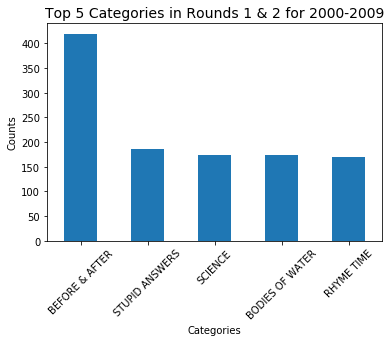

In [15]:
#plot out category values from air dates in 2000-2009 for rounds 1 & 2 
title_00="Top 5 Categories in Rounds 1 & 2 for 2000-2009"
early_00 = early_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_00, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig5_00s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [16]:
#pull out rows from air dates in 2000-2009 for final round by using groupby & to find top 5 categories with total count
final_00 = finals_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f00 = len(finals_df['2000':'2009'].groupby("category"))
print(final_00)
print(count_f00)

                  round
category               
WORD ORIGINS         23
U.S. PRESIDENTS      21
STATE CAPITALS       21
FAMOUS AMERICANS     17
HISTORIC NAMES       15
1404


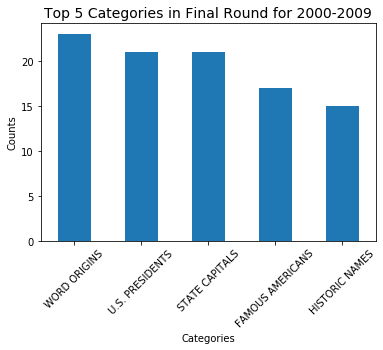

In [17]:
#plot out category values from air dates in 2000-2009 for Final Round (3)
title_f00="Top 5 Categories in Final Round for 2000-2009"
final_00 = finals_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f00, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig6_00s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

In [18]:
#pull out rows from air dates in 2010-2019 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_10 = early_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_10 = len(early_df['2010':'2019'].groupby("category"))
print(early_10)
print(count_10)

                  round
category               
AMERICAN HISTORY    177
NONFICTION          164
POTPOURRI           149
WORD ORIGINS        135
POP CULTURE         123
20549


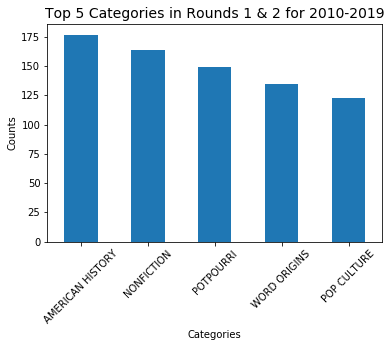

In [19]:
#plot out category values from air dates in 2010-2019 for rounds 1 & 2 
title_10="Top 5 Categories in Rounds 1 & 2 for 2010-2019"
early_10 = early_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_10, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig7_10s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [20]:
#pull out rows from air dates in 2010-2019 for final round by using groupby & to find top 5 categories with total count
final_10 = finals_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f10 = len(finals_df['2010':'2019'].groupby("category"))
print(final_10)
print(count_f10)

                 round
category              
AUTHORS             20
U.S. PRESIDENTS     17
WORD ORIGINS        16
AMERICANA           15
THE OSCARS          15
1433


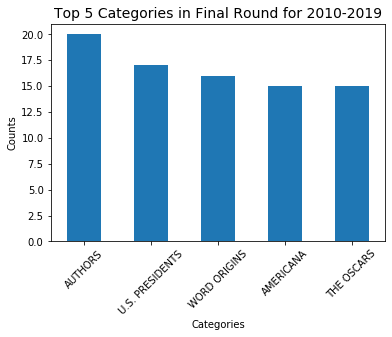

In [21]:
#plot out category values from air dates in 2010-2019 for Final Round (3)
title_f10="Top 5 Categories in Final Round for 2010-2019"
final_10 = finals_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f10, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig8_10s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

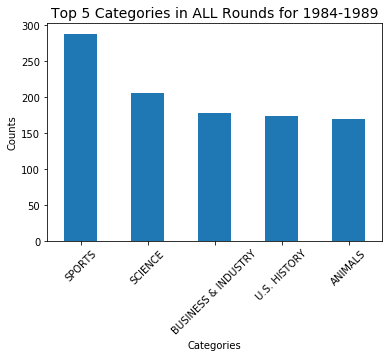

In [22]:
#plot out category values from air dates in 1984-1989 for ALL rounds
title_all80="Top 5 Categories in ALL Rounds for 1984-1989"
all_80 = jeopardy_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all80, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig9_80s_all.png", dpi=100, bbox_inches='tight')
plt.show()

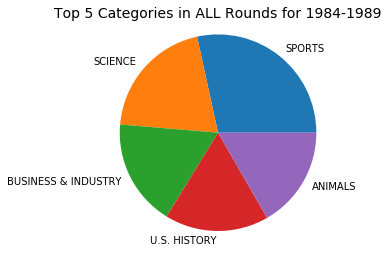

In [23]:
#pie plot of category values from air dates in 1984-1989 for ALL rounds
title_pall80="Top 5 Categories in ALL Rounds for 1984-1989"
all_p80 = jeopardy_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots=True, rot=45, legend=False)
plt.title(title_all80, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig9_80s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

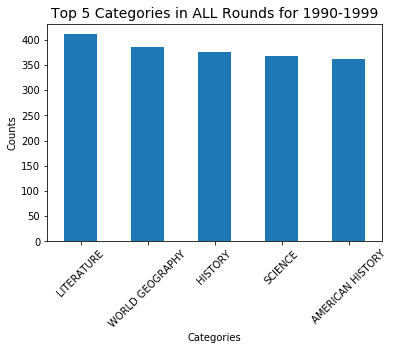

In [24]:
#plot out category values from air dates in 1990-1999 for ALL Rounds
title_all90="Top 5 Categories in ALL Rounds for 1990-1999"
all_90 = jeopardy_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all90, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig10_90s_all.png", dpi=100, bbox_inches='tight')
plt.show()

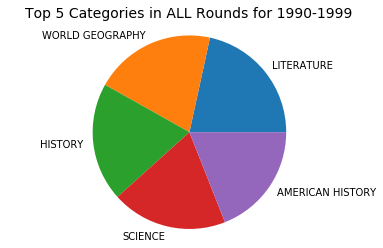

In [25]:
#pie plot of category values from air dates in 1990-1999 for ALL Rounds
title_pall90="Top 5 Categories in ALL Rounds for 1990-1999"
all_p90 = jeopardy_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots=True, rot=45, legend=False)
plt.title(title_all90, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig10_90s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

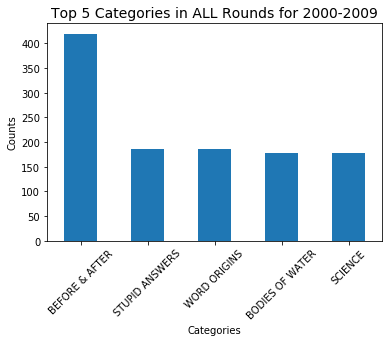

In [26]:
#plot out category values from air dates in 2000-2009 for ALL Rounds
title_all00="Top 5 Categories in ALL Rounds for 2000-2009"
all_00 = jeopardy_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all00, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig11_00s_all.png", dpi=100, bbox_inches='tight')
plt.show()

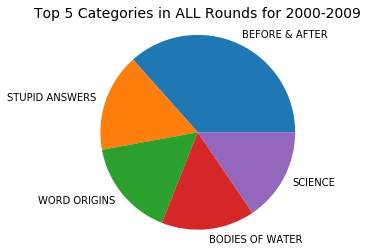

In [27]:
#pie plot of category values from air dates in 2000-2009 for ALL Rounds
title_pall00="Top 5 Categories in ALL Rounds for 2000-2009"
all_p00 = jeopardy_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots=True, rot=45, legend=False)
plt.title(title_pall00, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig11_00s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

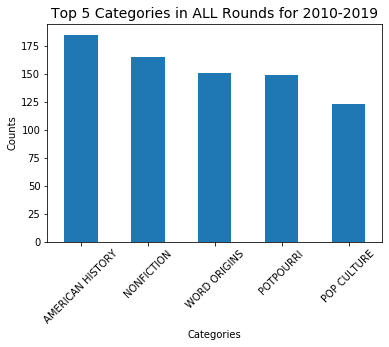

In [28]:
#plot out category values from air dates in 2010-2019 for ALL Rounds
title_all10="Top 5 Categories in ALL Rounds for 2010-2019"
all_10 = jeopardy_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all10, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig12_10s_all.png", dpi=100, bbox_inches='tight')
plt.show()

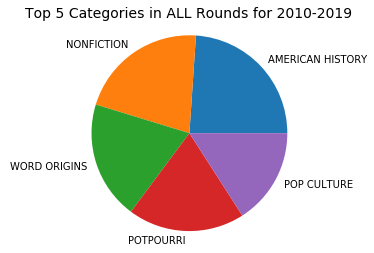

In [29]:
#pie plot of category values from air dates in 2010-2019 for ALL Rounds
title_pall10="Top 5 Categories in ALL Rounds for 2010-2019"
all_p10 = jeopardy_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots= True, rot=45, legend=False)
plt.title(title_pall10, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig12_10s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

In [30]:
#pull out rows for Ovarall - ALL rounds AlL air dates by using groupby & to find top 5 categories with total count
cat_all = jeopardy_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_all = len(jeopardy_df.groupby("category"))
print(cat_all)
print(count_all)

                  round
category               
SCIENCE             860
LITERATURE          814
AMERICAN HISTORY    788
HISTORY             720
SPORTS              701
43369


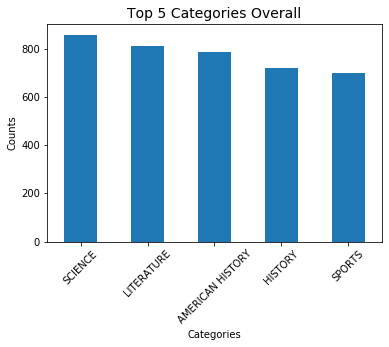

In [31]:
#plot out category values for Overall - ALL Rounds ALL air dates
title_all="Top 5 Categories Overall"
all_all = jeopardy_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig14_overall.png", dpi=100, bbox_inches='tight')
plt.show()


In [32]:
#pull out rows for rounds 1 & 2 (all air dates) by using groupby & to find top 5 categories with total count
early_all = early_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_all = len(early_df.groupby("category"))
print(early_all)
print(count_all)

                  round
category               
SCIENCE             849
LITERATURE          798
AMERICAN HISTORY    755
HISTORY             716
POTPOURRI           699
41881


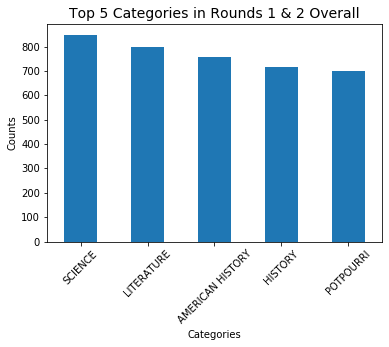

In [33]:
#plot out category values for rounds 1 & 2 (all air dates)
title_eall="Top 5 Categories in Rounds 1 & 2 Overall"
early_all = early_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_eall, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig15_all_R1.png", dpi=100, bbox_inches='tight')
plt.show()

In [34]:
#pull out rows for final round (all air dates) by using groupby & to find top 5 categories with total count
final_all = finals_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_fall = len(finals_df.groupby("category"))
print(final_all)
print(count_fall)

                 round
category              
U.S. PRESIDENTS     75
WORD ORIGINS        55
STATE CAPITALS      53
AUTHORS             48
THE OSCARS          43
2878


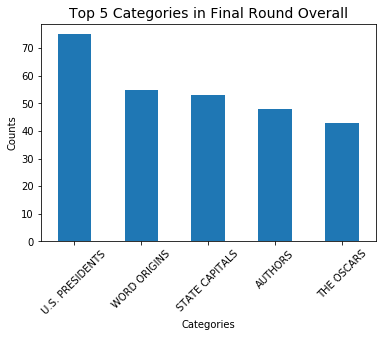

In [35]:
#plot out category values for Final Round (3) for all air dates
title_fall="Top 5 Categories in Final Round Overall"
final_all = finals_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_fall, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig16_all_R3.png", dpi=100, bbox_inches='tight')
plt.show()

In [36]:
#pull out daily doubles into separate dataframe
double_df = jeopardy_adult_df.loc[jeopardy_adult_df["daily_double"] == "yes"]
double_df.head()

,round,value,daily_double,category,comments,answer,question,air_date,notes
44,2,1000,yes,4-LETTER WORDS,-,"It's the first 4-letter word in ""The Star Span...",what,1984-09-10,-
69,1,400,yes,BY THE NUMBERS,-,Total of Disney's Dalmatians and dwarfs,108,1984-09-11,-
107,1,400,yes,AUTOMOBILES,-,"Models of Ford, Chrysler, & Cadillac are all n...",Spain,1984-09-12,-
126,2,1500,yes,NEW TESTAMENT,-,"\""Blessed are"" these ""for they shall be called...",the peacemakers,1984-09-12,-
179,2,3500,yes,ANATOMY,-,"Prominent zygomatic bones, considered an attra...",cheek bones,1984-09-13,-


In [37]:
#delete un-needed columns for daily doubles
double_df.drop('comments', axis=1, inplace=True)
double_df.drop('notes', axis=1, inplace=True)
double_df.drop('value', axis=1, inplace=True)
double_df.drop('answer', axis=1, inplace=True)
double_df.drop('question', axis=1, inplace=True)
double_df.drop('round', axis=1, inplace=True)
double_df.drop('air_date', axis=1, inplace=True)

double_df.head()


C:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,daily_double,category
44,yes,4-LETTER WORDS
69,yes,BY THE NUMBERS
107,yes,AUTOMOBILES
126,yes,NEW TESTAMENT
179,yes,ANATOMY


In [38]:
#pull out category values for all Daily Doubles
double_all = double_df.groupby('category').count().sort_values('daily_double', 
        ascending=False).head(5)
count_double = len(double_df.groupby("category"))
print(double_all)
print(count_double)

                  daily_double
category                      
AMERICAN HISTORY            58
WORLD HISTORY               56
SCIENCE                     55
WORLD GEOGRAPHY             54
LITERATURE                  52
11119


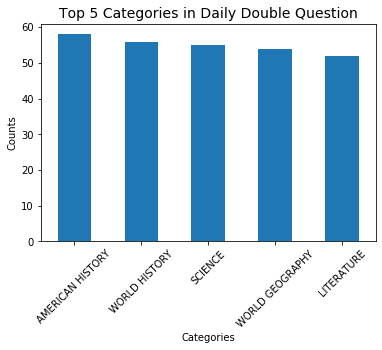

In [39]:
#plot out category values for all Daily Doubles
title_double="Top 5 Categories in Daily Double Question"
double_10 = double_df.groupby('category').count().sort_values('daily_double', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_double, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig13_double_all.png", dpi=100, bbox_inches='tight')
plt.show()